# **HEALTHCARE COMPANIES STOCK ANALYSIS**

---



In [1]:
import requests
import re
import html
import csv

def clean_html(raw_html):
    """ Utility function to remove HTML tags and decode HTML entities from a string """
    cleanr = re.compile('<.*?>')  # Matches any HTML tag
    cleantext = re.sub(cleanr, '', raw_html)
    return html.unescape(cleantext)  # Decode HTML entities like &amp; to &

# Fetch the HTML content
url = "https://stockanalysis.com/stocks/sector/healthcare/"
response = requests.get(url)
html_content = response.text

# Define the headers for the 7 columns that are consistently available
headers = ["ID", "Symbol", "Company Name", "Market Cap", "Price Change 1D (%)", "Volume", "Revenue"]

# Open a CSV file to write the data
with open('healthcare_stocks.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)  # Write the header row

    # Regex pattern to extract the entire table by its ID
    pattern = r'<table id="main-table"[^>]*>(.*?)</table>'
    table_content = re.search(pattern, html_content, re.DOTALL)

    if table_content:
        # Regex to extract each row, considering possible attributes and nested tags within tr
        rows = re.findall(r'<tr[^>]*>(.*?)</tr>', table_content.group(1), re.DOTALL)
        if not rows:
            print("Found table but no rows.")
        for row in rows:
            # Regex to extract each cell's content, including handling nested HTML within td
            cells = re.findall(r'<td[^>]*>(.*?)</td>', row, re.DOTALL)
            cleaned_cells = [clean_html(cell) for cell in cells]  # Cleaning HTML tags and entities from each cell
            if len(cleaned_cells) == len(headers):
                writer.writerow(cleaned_cells)  # Write the cleaned row data
                print("Data written to CSV:", cleaned_cells)
            else:
                print("Incomplete data found, not writing to CSV:", cleaned_cells)
    else:
        print("No table found with id='main-table' or the regex did not match.")


Incomplete data found, not writing to CSV: []
Data written to CSV: ['1', 'LLY', 'Eli Lilly and Company', '739.20B', '1.45%', '2,842,406', '35.93B']
Data written to CSV: ['2', 'NVO', 'Novo Nordisk A/S', '542.69B', '2.17%', '4,067,381', '35.35B']
Data written to CSV: ['3', 'UNH', 'UnitedHealth Group Incorporated', '460.92B', '1.33%', '3,395,757', '371.62B']
Data written to CSV: ['4', 'JNJ', 'Johnson & Johnson', '357.92B', '0.09%', '6,904,494', '81.80B']
Data written to CSV: ['5', 'MRK', 'Merck & Co., Inc.', '330.23B', '2.20%', '6,566,816', '61.40B']
Data written to CSV: ['6', 'ABBV', 'AbbVie Inc.', '287.82B', '-0.11%', '5,171,495', '54.40B']
Data written to CSV: ['7', 'AZN', 'AstraZeneca PLC', '236.58B', '0.74%', '5,733,754', '47.61B']
Data written to CSV: ['8', 'TMO', 'Thermo Fisher Scientific Inc.', '218.67B', '-0.12%', '1,771,702', '42.49B']
Data written to CSV: ['9', 'NVS', 'Novartis AG', '193.83B', '1.37%', '1,154,648', '49.92B']
Data written to CSV: ['10', 'ABT', 'Abbott Laboratori

In [2]:
import requests
import re
import html
import sqlite3

def clean_html(raw_html):
    """ Utility function to remove HTML tags and decode HTML entities from a string """
    cleanr = re.compile('<.*?>')  # Matches any HTML tag
    cleantext = re.sub(cleanr, '', raw_html)
    return html.unescape(cleantext)  # Decode HTML entities like &amp; to &

# Fetch the HTML content
url = "https://stockanalysis.com/stocks/sector/healthcare/"
response = requests.get(url)
html_content = response.text

# Database connection
conn = sqlite3.connect('healthcare_stocks.db')
c = conn.cursor()

# Create table, ensuring ID is unique
c.execute('''
CREATE TABLE IF NOT EXISTS stocks (
    ID INTEGER PRIMARY KEY,
    Symbol TEXT,
    Company_Name TEXT,
    Market_Cap TEXT,
    Price_Change_1D TEXT,
    Volume TEXT,
    Revenue TEXT
)
''')

# Regex pattern to extract the entire table by its ID
pattern = r'<table id="main-table"[^>]*>(.*?)</table>'
table_content = re.search(pattern, html_content, re.DOTALL)

if table_content:
    # Regex to extract each row, considering possible attributes and nested tags within tr
    rows = re.findall(r'<tr[^>]*>(.*?)</tr>', table_content.group(1), re.DOTALL)
    if not rows:
        print("Found table but no rows.")
    for row in rows:
        # Regex to extract each cell's content, including handling nested HTML within td
        cells = re.findall(r'<td[^>]*>(.*?)</td>', row, re.DOTALL)
        cleaned_cells = [clean_html(cell) for cell in cells]  # Cleaning HTML tags and entities from each cell
        if len(cleaned_cells) == 7:  # Ensure we have the correct number of columns
            # Using INSERT OR REPLACE to handle potential duplicate IDs
            c.execute('''
            INSERT OR REPLACE INTO stocks (ID, Symbol, Company_Name, Market_Cap, Price_Change_1D, Volume, Revenue)
            VALUES (?, ?, ?, ?, ?, ?, ?)''', tuple(cleaned_cells))
            conn.commit()
            print("Data written to database:", cleaned_cells)
        else:
            print("data found,storing in database:", cleaned_cells)
else:
    print("No table found with id='main-table' or the regex did not match.")

# Close the database connection
conn.close()

data found,storing in database: []
Data written to database: ['1', 'LLY', 'Eli Lilly and Company', '739.20B', '1.45%', '2,842,406', '35.93B']
Data written to database: ['2', 'NVO', 'Novo Nordisk A/S', '542.69B', '2.17%', '4,067,381', '35.35B']
Data written to database: ['3', 'UNH', 'UnitedHealth Group Incorporated', '460.92B', '1.33%', '3,395,757', '371.62B']
Data written to database: ['4', 'JNJ', 'Johnson & Johnson', '357.92B', '0.09%', '6,904,494', '81.80B']
Data written to database: ['5', 'MRK', 'Merck & Co., Inc.', '330.23B', '2.20%', '6,566,816', '61.40B']
Data written to database: ['6', 'ABBV', 'AbbVie Inc.', '287.82B', '-0.11%', '5,171,495', '54.40B']
Data written to database: ['7', 'AZN', 'AstraZeneca PLC', '236.58B', '0.74%', '5,733,754', '47.61B']
Data written to database: ['8', 'TMO', 'Thermo Fisher Scientific Inc.', '218.67B', '-0.12%', '1,771,702', '42.49B']
Data written to database: ['9', 'NVS', 'Novartis AG', '193.83B', '1.37%', '1,154,648', '49.92B']
Data written to dat

In [3]:
### DATA CLEANING AND PREPARATION

import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('healthcare_stocks.db')

# Load data into a pandas DataFrame
query = "SELECT * FROM stocks"
df = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

print(df.head())  # Display the first few rows of the DataFrame to check data


   ID Symbol                     Company_Name Market_Cap Price_Change_1D  \
0   1    LLY            Eli Lilly and Company    739.20B           1.45%   
1   2    NVO                 Novo Nordisk A/S    542.69B           2.17%   
2   3    UNH  UnitedHealth Group Incorporated    460.92B           1.33%   
3   4    JNJ                Johnson & Johnson    357.92B           0.09%   
4   5    MRK                Merck & Co., Inc.    330.23B           2.20%   

      Volume  Revenue  
0  2,842,406   35.93B  
1  4,067,381   35.35B  
2  3,395,757  371.62B  
3  6,904,494   81.80B  
4  6,566,816   61.40B  


In [4]:
# Check for missing values
print(df.isnull().sum())

# If missing values are not extensive, you might choose to drop them, or fill them
df = df.dropna()  # Drops rows with any missing values
# or
df.fillna(method='ffill', inplace=True)  # Forward fill to propagate last valid observation

# Convert 'Volume' from a string with commas to an integer
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)


print(df.dtypes)  # Check data types


ID                 0
Symbol             0
Company_Name       0
Market_Cap         0
Price_Change_1D    0
Volume             0
Revenue            0
dtype: int64
ID                  int64
Symbol             object
Company_Name       object
Market_Cap         object
Price_Change_1D    object
Volume              int64
Revenue            object
dtype: object


In [5]:
### Converting 'Market Cap' to a numerical value in Billions.

df['Market_Cap (B)'] = df['Market_Cap'].apply(lambda x: float(x[:-1]) if 'B' in x else float(x[:-1]) / 1000)
print(df.head())

   ID Symbol                     Company_Name Market_Cap Price_Change_1D  \
0   1    LLY            Eli Lilly and Company    739.20B           1.45%   
1   2    NVO                 Novo Nordisk A/S    542.69B           2.17%   
2   3    UNH  UnitedHealth Group Incorporated    460.92B           1.33%   
3   4    JNJ                Johnson & Johnson    357.92B           0.09%   
4   5    MRK                Merck & Co., Inc.    330.23B           2.20%   

    Volume  Revenue  Market_Cap (B)  
0  2842406   35.93B          739.20  
1  4067381   35.35B          542.69  
2  3395757  371.62B          460.92  
3  6904494   81.80B          357.92  
4  6566816   61.40B          330.23  


# **DESCRIPTIVE ANALYSIS**

In [6]:
import pandas as pd

# Function to convert revenue to a consistent format in billions
def convert_revenue(x):
    if 'B' in x:
        return float(x.replace('B', ''))
    elif 'M' in x:
        return float(x.replace('M', '')) / 1000  # Convert millions to billions
    return pd.NA  # Handle any unexpected formats

# Apply the conversion function to the 'Revenue' column
df['Revenue (B)'] = df['Revenue'].apply(convert_revenue)

# Convert 'Price_Change_1D' to a float after removing the '%' sign
df['Price_Change_1D'] = pd.to_numeric(df['Price_Change_1D'].astype(str).str.replace('%', ''), errors='coerce')

# Convert 'Volume' to int
df['Volume'] = df['Volume'].astype(int)

df['Market_Cap (B)'].fillna(df['Market_Cap (B)'].median(), inplace=True)
df['Price_Change_1D'].fillna(df['Price_Change_1D'].median(), inplace=True)
df['Volume'].fillna(df['Volume'].median(), inplace=True)
df['Revenue (B)'].fillna(df['Revenue (B)'].median(), inplace=True)

# Descriptive statistics for numeric columns
print("Descriptive Statistics for Numeric Data:")
print(df[['Market_Cap (B)', 'Price_Change_1D', 'Volume', 'Revenue (B)']].describe())

# Additional descriptive metrics for numeric columns
print("\nAdditional Metrics:")
print("Variance:\n", df[['Market_Cap (B)', 'Price_Change_1D', 'Volume', 'Revenue (B)']].var())
print("Skewness:\n", df[['Market_Cap (B)', 'Price_Change_1D', 'Volume', 'Revenue (B)']].skew())
print("Kurtosis:\n", df[['Market_Cap (B)', 'Price_Change_1D', 'Volume', 'Revenue (B)']].kurt())

# Mode for numeric and categorical columns
print("\nMode for each column:")
print(df.mode().iloc[0])

# Display data types to confirm all conversions have been done properly
print("\nData Types:")
print(df.dtypes)




Descriptive Statistics for Numeric Data:
       Market_Cap (B)  Price_Change_1D        Volume  Revenue (B)
count     1204.000000      1204.000000  1.204000e+03  1204.000000
mean         6.684024         0.038397  1.147024e+06     3.345963
std         38.609452         5.080866  5.302882e+06    23.253309
min          0.001010       -30.670000  3.000000e+00    -0.002850
25%          0.033650        -2.040000  5.228800e+04     0.045963
50%          0.221565        -0.070000  2.499760e+05     0.091300
75%          1.222500         1.600000  7.958270e+05     0.196320
max        739.200000        54.040000  1.336714e+08   371.620000

Additional Metrics:
Variance:
 Market_Cap (B)     1.490690e+03
Price_Change_1D    2.581520e+01
Volume             2.812056e+13
Revenue (B)        5.407164e+02
dtype: float64
Skewness:
 Market_Cap (B)     11.603047
Price_Change_1D     1.912047
Volume             16.254809
Revenue (B)        11.616052
dtype: float64
Kurtosis:
 Market_Cap (B)     168.476861
Price_C

# **VISUALIZATION**


***1. TOP 10 COMPANIES BY MARKET CAPITALIZATION***





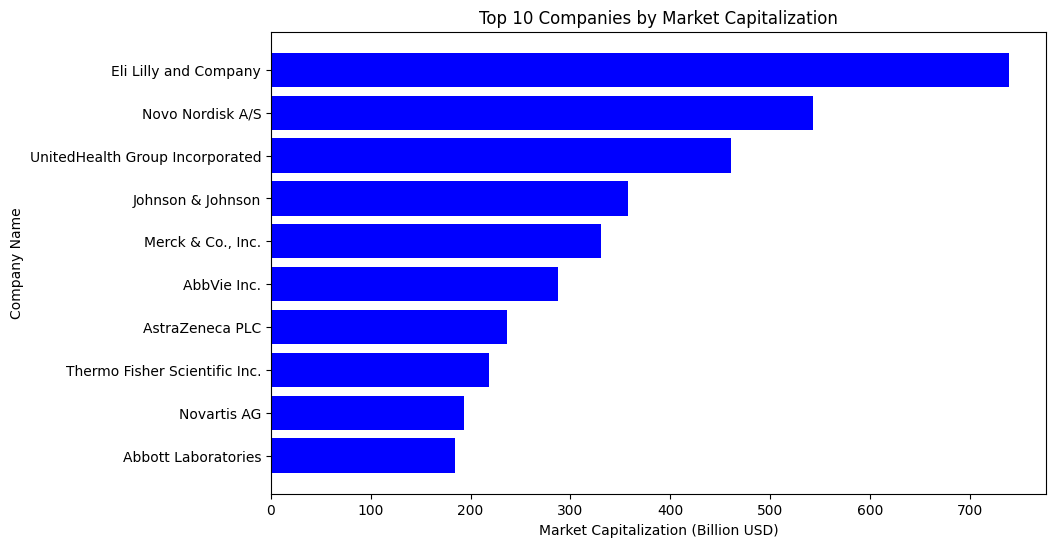

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' is loaded and cleaned

# Sorting the data by 'Market_Cap (B)' and selecting the top 10
top_market_caps = df.nlargest(10, 'Market_Cap (B)')

# Creating a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_market_caps['Company_Name'], top_market_caps['Market_Cap (B)'], color='blue')
plt.xlabel('Market Capitalization (Billion USD)')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest on top
plt.show()


***2. TOP 10 COMPANIES BY REVENUE***

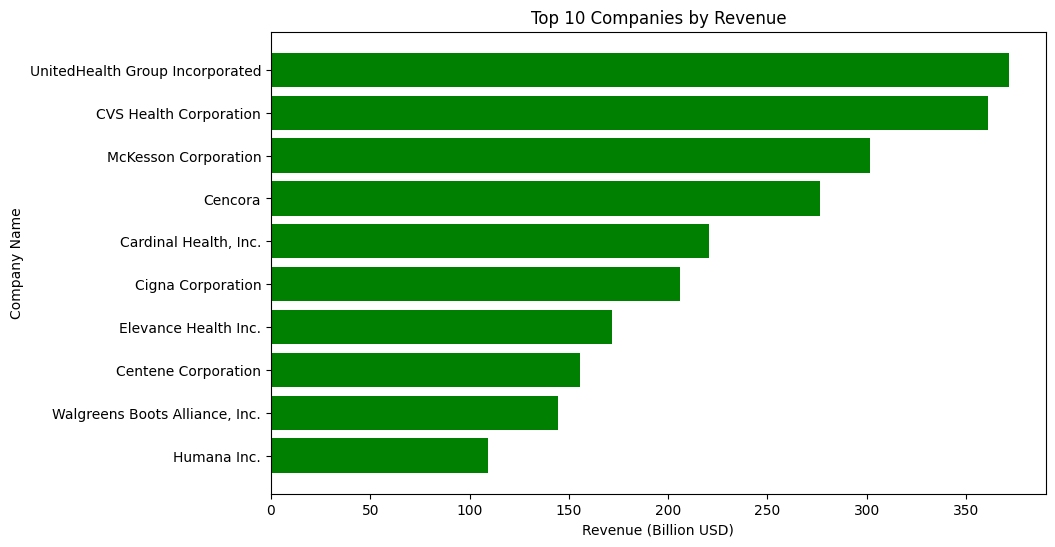

In [8]:
# Sorting the data by 'Revenue (B)' and selecting the top 10
top_revenue = df.nlargest(10, 'Revenue (B)')

# Creating a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_revenue['Company_Name'], top_revenue['Revenue (B)'], color='green')
plt.xlabel('Revenue (Billion USD)')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest on top
plt.show()


***3. COMPANIES WITH LARGEST DAILY PRICE CHANGES***

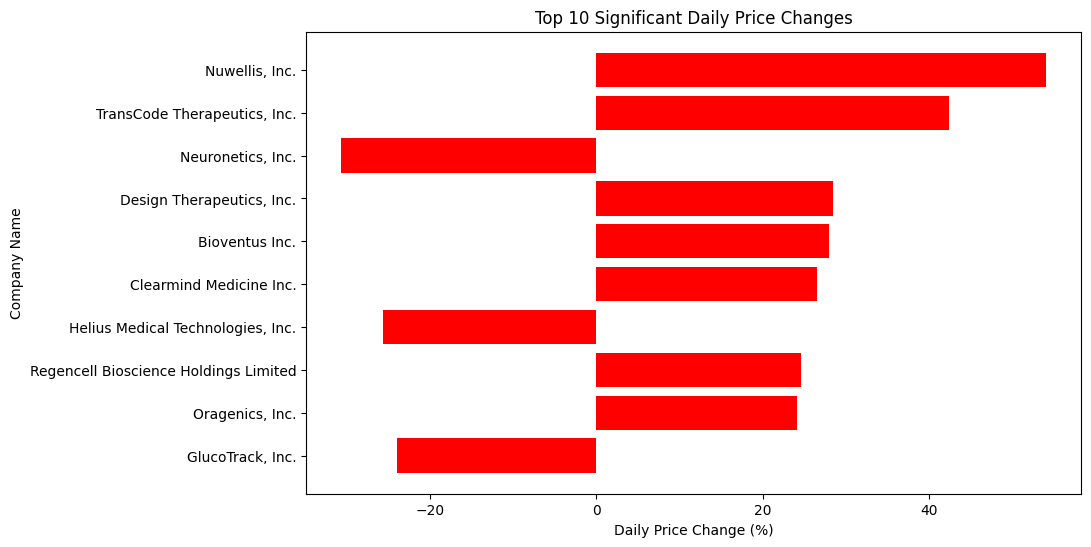

In [10]:
# Sorting the data by the absolute values of 'Price_Change_1D' to get significant changes
df['Price_Change_1D_Abs'] = df['Price_Change_1D'].abs()
significant_changes = df.nlargest(10, 'Price_Change_1D_Abs')

# Creating a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(significant_changes['Company_Name'], significant_changes['Price_Change_1D'], color='red')
plt.xlabel('Daily Price Change (%)')
plt.ylabel('Company Name')
plt.title('Top 10 Significant Daily Price Changes')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest on top
plt.show()


***4. HISTOGRAM OF DAILY PRICE CHANGES***

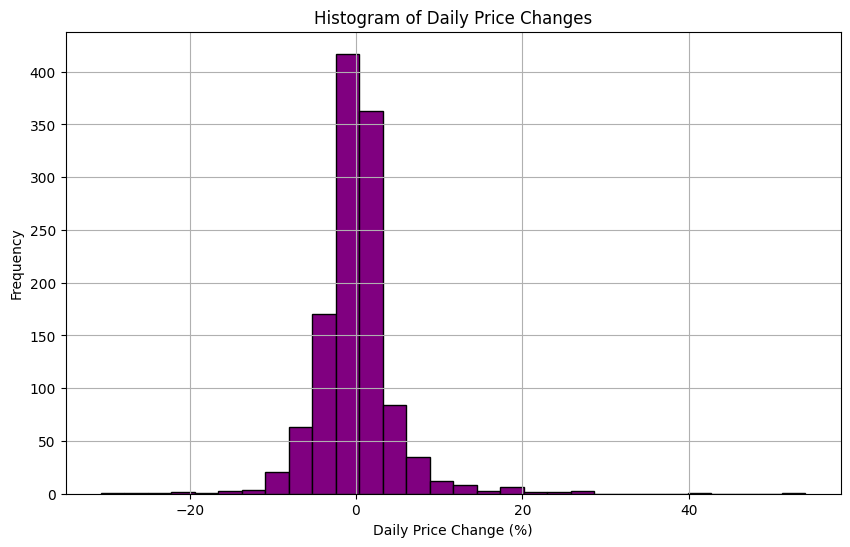

In [11]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Price_Change_1D' is cleaned

# Creating a histogram of daily price changes
plt.figure(figsize=(10, 6))
plt.hist(df['Price_Change_1D'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Daily Price Changes')
plt.xlabel('Daily Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **OLS LINEAR REGRESSION**

In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Function to convert financials with 'B', 'M', and 'K'
def convert_financials(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('B', '')) * 1000  # Convert billions to millions
        elif 'M' in value:
            return float(value.replace('M', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) / 1000  # Convert thousands to millions
    return value  # Return the original value if it's not a string

# Apply conversion function to 'Revenue'
df['Revenue'] = df['Revenue'].apply(convert_financials)

# Convert 'Price Change 1D (%)' to numeric, handling '-' and removing '%'
if 'Price Change 1D (%)' in df.columns:
    df['Price_Change_1D'] = df['Price Change 1D (%)'].str.replace('%', '').replace('-', '0').astype(float) / 100

# Convert 'Volume' to numeric, ensuring no commas interfere
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Handle any remaining missing values
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Price_Change_1D'] = pd.to_numeric(df['Price_Change_1D'], errors='coerce')

# Drop rows with NaN values that may result from conversion issues
df.dropna(subset=['Price_Change_1D', 'Volume', 'Revenue'], inplace=True)

# Prepare the features and the target variable
X = df[['Volume', 'Revenue']]
y = df['Price_Change_1D']

# Convert all features and target to float to avoid dtype issues
X = X.astype(float)
y = y.astype(float)

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the model's summary
print(results.summary())

# Making predictions on the test set
predictions = results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


                            OLS Regression Results                            
Dep. Variable:        Price_Change_1D   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     45.96
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.79e-19
Time:                        21:49:15   Log-Likelihood:                -2057.0
No. Observations:                 699   AIC:                             4120.
Df Residuals:                     696   BIC:                             4134.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3139      0.180     -1.743      0.0

# **K-MEANS CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

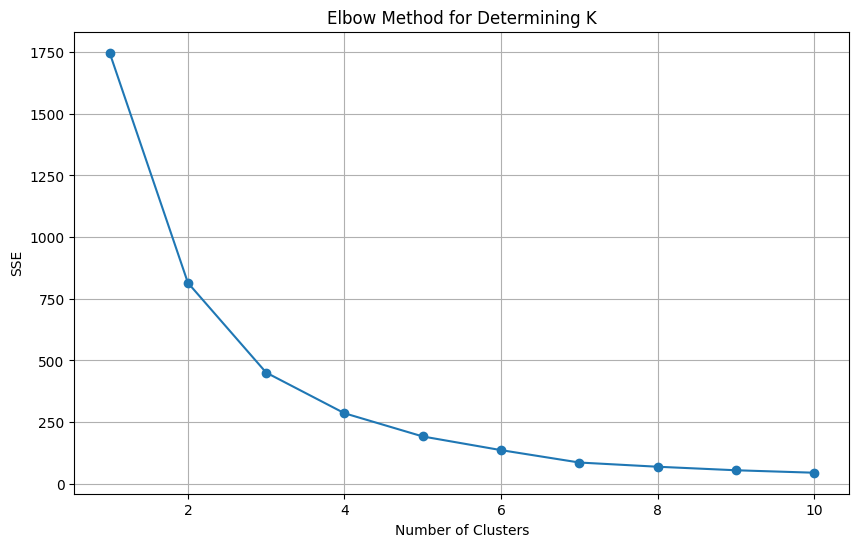

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


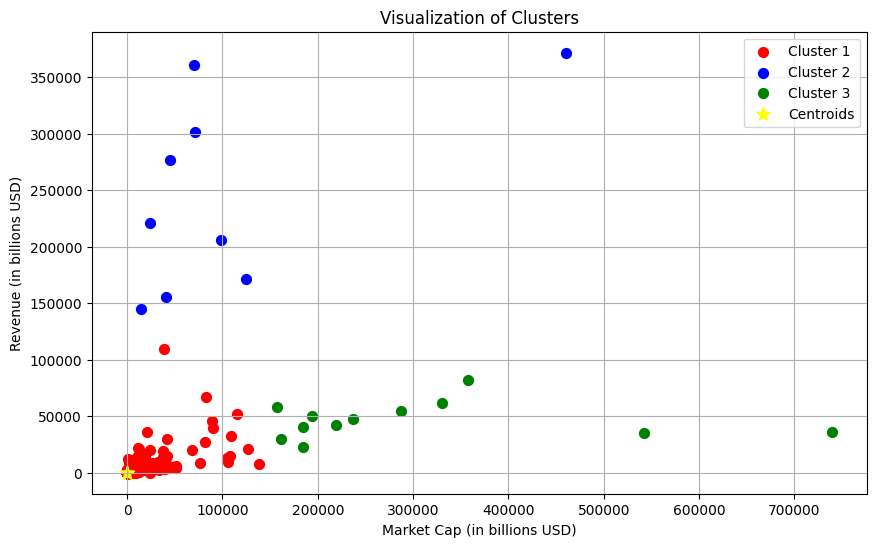

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def convert_financials(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace('B', '')) * 1000  # Convert billions to millions
        elif 'M' in value:
            return float(value.replace('M', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) / 1000  # Convert thousands to millions
        else:
            return float(value)  # Convert strings without suffixes to floats
    return value  # Return the original value if it's not a string

df['Market_Cap'] = df['Market_Cap'].apply(convert_financials)

# Apply conversion function to 'Revenue'
df['Revenue'] = df['Revenue'].apply(convert_financials)

# Convert 'Price Change 1D (%)' to numeric, handling '-' and removing '%'
if 'Price Change 1D (%)' in df.columns:
    df['Price_Change_1D'] = df['Price Change 1D (%)'].str.replace('%', '').replace('-', '0').astype(float) / 100

# Convert 'Volume' to numeric, ensuring no commas interfere
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Handle any remaining missing values
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Price_Change_1D'] = pd.to_numeric(df['Price_Change_1D'], errors='coerce')

# Drop rows with NaN values that may result from conversion issues
df.dropna(subset=['Price_Change_1D', 'Volume', 'Revenue'], inplace=True)



# Preparing data, selecting only the necessary columns and dropping NA values
data = df[['Market_Cap', 'Revenue']].dropna()

# Standardizing the data to make it suitable for k-means clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Using the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Assuming the elbow point is determined at k = 3 (example)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster IDs to the original data
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Market_Cap'][df['Cluster'] == 0], df['Revenue'][df['Cluster'] == 0], s=50, c='red', label='Cluster 1')
plt.scatter(df['Market_Cap'][df['Cluster'] == 1], df['Revenue'][df['Cluster'] == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(df['Market_Cap'][df['Cluster'] == 2], df['Revenue'][df['Cluster'] == 2], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', marker='*', label='Centroids')
plt.title('Visualization of Clusters')
plt.xlabel('Market Cap (in billions USD)')
plt.ylabel('Revenue (in billions USD)')
plt.legend()
plt.grid(True)
plt.show()

# **CORRELATION ANALYSIS**

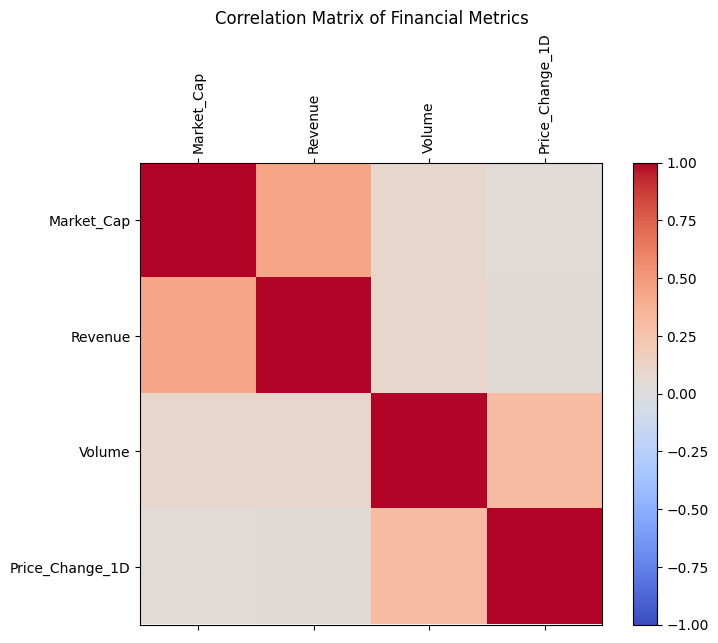

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it's already loaded with your data

# Calculate the correlation matrix
correlation_matrix = df[['Market_Cap', 'Revenue', 'Volume', 'Price_Change_1D']].corr()

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set ticks and labels
ticks = np.arange(0, len(correlation_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate the tick labels for x-axis to improve readability
plt.xticks(rotation=90)

# Add title and show the plot
plt.title('Correlation Matrix of Financial Metrics')
plt.show()



# **PREDICTIVE MODELLING**

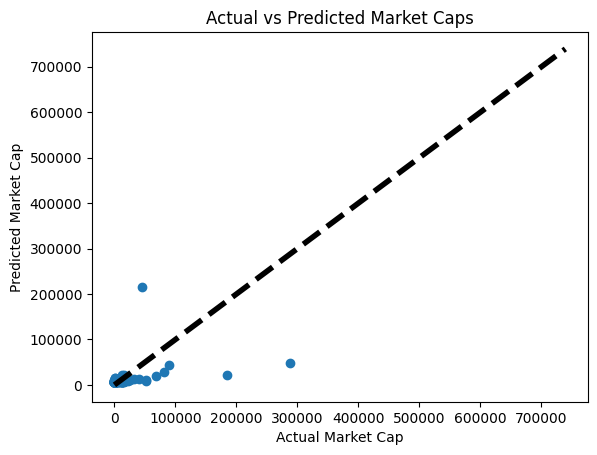

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you want to predict 'Market_Cap (B)' based on 'Revenue (B)' and 'Volume'
X = df[['Revenue', 'Volume']]
y = df['Market_Cap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plotting actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Market Caps')
plt.show()


# **XG BOOST**

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost R^2 Score: {xgb_r2}")

XGBoost Mean Squared Error: 208569622.39328954
XGBoost R^2 Score: 0.7408017543426908


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

# Evaluate
predictions = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Enhanced XGBoost Mean Squared Error: {mse}")
print(f"Enhanced XGBoost R^2 Score: {r2}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Enhanced XGBoost Mean Squared Error: 268090451.0730716
Enhanced XGBoost R^2 Score: 0.6668327161057728


In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Define a PCA that retains 95% of the variance
pca = PCA(n_components=0.95)

# Define the XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create a pipeline that first reduces dimensionality then fits a model
pipeline = Pipeline(steps=[('pca', pca), ('regressor', xgb)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"PCA + XGBoost Mean Squared Error: {mse}")
print(f"PCA + XGBoost R^2 Score: {r2}")


PCA + XGBoost Mean Squared Error: 855143933.7576916
PCA + XGBoost R^2 Score: -0.06272334806516544


# **CLUSTERING**

In [20]:
import pandas as pd
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Connect to the SQLite database
conn = sqlite3.connect('healthcare_stocks.db')

# Load data into a pandas DataFrame
query = "SELECT * FROM stocks"
df = pd.read_sql_query(query, conn)
conn.close()

# Function to convert financials with 'B', 'M', and 'K'
def convert_financials(value):
    if value.endswith('B'):
        return float(value[:-1])
    elif value.endswith('M'):
        return float(value[:-1]) / 1000  # Convert millions to billions
    elif value.endswith('K'):
        return float(value[:-1]) / 1000000  # Convert thousands to billions
    try:
        return float(value)
    except ValueError:
        return None  # Return None if conversion is not possible

# Clean 'Price Change 1D (%)'
df['Price_Change_1D'] = df['Price_Change_1D'].str.replace('%', '').replace('-', '0').astype(float) / 100

# Convert 'Market Cap' and 'Revenue'
df['Market_Cap_B'] = df['Market_Cap'].apply(convert_financials)
df['Revenue_B'] = df['Revenue'].apply(convert_financials)

# Convert 'Volume', removing commas and converting to int
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)

# Handle possible NaNs after conversion
df.dropna(subset=['Market_Cap_B', 'Revenue_B', 'Volume'], inplace=True)

# Scale the features for clustering
scaler = StandardScaler()
features = df[['Market_Cap_B', 'Revenue_B', 'Volume']]
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Selecting features and target for the model within each cluster
results = {}
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    X = cluster_data[['Volume', 'Market_Cap_B', 'Revenue_B']]  # Features
    y = cluster_data['Price_Change_1D']  # Target

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting and evaluating the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store the results for each cluster
    results[cluster] = (mse, r2)

# Output the model's performance for each cluster
for cluster, (mse, r2) in results.items():
    print(f"Cluster {cluster}: Mean Squared Error: {mse}, R^2 Score: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 2: Mean Squared Error: 5.883025768459803e-05, R^2 Score: 0.14329026234748765
Cluster 0: Mean Squared Error: 0.0014803219608922398, R^2 Score: -0.03037189523967254
Cluster 1: Mean Squared Error: 4330.447003880398, R^2 Score: -10304453.500607729


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

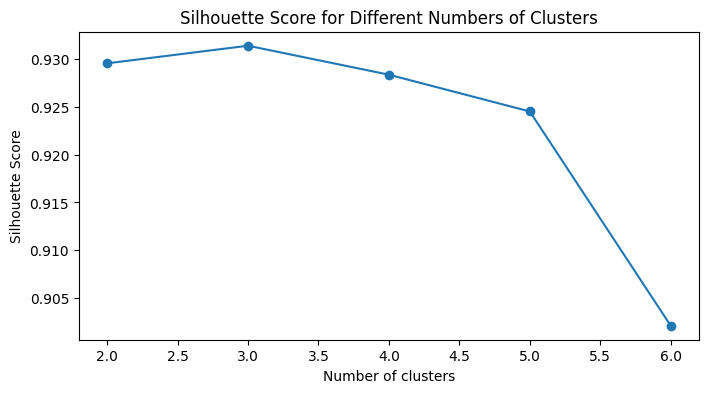

Optimal number of clusters: 3


In [21]:
from sklearn.metrics import silhouette_score

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['Market_Cap_B', 'Revenue_B', 'Volume']])

# Test different numbers of clusters
silhouette_scores = []
for k in range(2, 7):  # Testing from 2 to 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Select the optimal number based on the highest silhouette score
optimal_clusters = range(2, 7)[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters if it's a 2D plot (optional)
if features_scaled.shape[1] == 2:
    plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Visualization')
    plt.show()

# Analyze each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe())

    # Additional modeling per cluster if necessary
    X = cluster_data[['Volume', 'Market_Cap_B', 'Revenue_B']]  # Features
    y = cluster_data['Price_Change_1D']  # Target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Mean Squared Error in Cluster {cluster}: {mse}")
    print(f"R^2 Score in Cluster {cluster}: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Summary:
                ID  Price_Change_1D        Volume  Market_Cap_B   Revenue_B  \
count    20.000000        20.000000  2.000000e+01     20.000000   20.000000   
mean     74.950000         0.035250  1.316807e+07    209.957701  135.839443   
std     252.056693         0.119260  3.039338e+07    196.222205  116.972673   
min       1.000000        -0.013800  6.863180e+05      0.004010    0.008860   
25%       5.750000         0.003975  1.706878e+06     63.782500   46.330000   
50%      11.500000         0.011650  3.731569e+06    170.755000   71.600000   
75%      30.250000         0.013900  6.651236e+06    298.422500  209.642500   
max    1143.000000         0.540400  1.336714e+08    739.200000  371.620000   

       Cluster  
count     20.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Mean Squared Error in Cluster 0: 0.0007002782932840922
R^2 Score in Cluster 0: -41.576579619035854
Cluster 1 Summary

Cluster Analysis
Cluster 0 (Smaller Cluster - Higher Market Cap and Revenue)
-Exhibits higher variability in the Price_Change_1D
-this cluster has a smaller MSE
Cluster 1 (Larger Cluster - Lower Market Cap and Revenue)
-The standard deviation for Price_Change_1D is lower than in Cluster 0, suggesting less price volatility.
-

In [23]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and already includes 'Cluster', 'Price_Change_1D', 'Volume', 'Market_Cap_B', 'Revenue_B'

# Calculate volatility within each cluster as standard deviation of daily price change
df['Price_Change_STD'] = df.groupby('Cluster')['Price_Change_1D'].transform(np.std)

# Group by Cluster and aggregate data
cluster_financials = df.groupby('Cluster').agg({
    'Price_Change_1D': ['mean', 'std'],
    'Volume': ['mean', 'std'],
    'Market_Cap_B': 'mean',
    'Revenue_B': ['mean', 'std']
}).rename(columns={'mean': 'Average', 'std': 'Standard Deviation'})

# Display the summarized data
print(cluster_financials)


        Price_Change_1D                           Volume                     \
                Average Standard Deviation       Average Standard Deviation   
Cluster                                                                       
0              0.035250           0.119260  1.316807e+07       3.039338e+07   
1             -0.000885           0.043694  1.100030e+06       3.533792e+06   

        Market_Cap_B   Revenue_B                     
             Average     Average Standard Deviation  
Cluster                                              
0         209.957701  135.839443         116.972673  
1           4.319042    1.490180           6.224085  


*   Cluster 0: Larger Companies
               Higher Price Change Volatility
               Larger Volume and Market Cap
               The average revenue is substantially higher
*   Cluster 1: Smaller Companies
               Lower Volatility in Price Changes
               Smaller Volume and Market Cap
               ower average revenue and variability




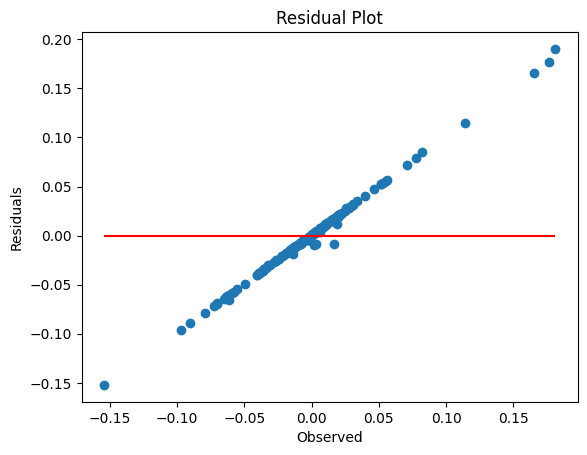

In [24]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Check for patterns: ideally, residuals should be randomly dispersed around the horizontal axis

# ***THANK YOU !***